In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
t_data = pd.read_csv("transcripts_dataset_final.csv")
print(t_data.shape)
t_data.head(2)

(105360, 13)


,show_id,episode_id,transcript,avg_confidence,word_count,show_name,show_description,publisher,language,episode_name,episode_description,duration,show_id_trans
0,show_2uE1HD7Mhar1BXrtbDTYXr,2MlANNCG8ByQl3yKo8YV33,"Hey guys, so like I'm in the middle of editing...",0.862924,20912,The Get Connected Podcast,"Getting Connected on all things Media, Mental ...",Morty,['en-AU'],Am I Liked?,"Am I liked? Well, living a life on social med...",29.238567,show_2uE1HD7Mhar1BXrtbDTYXr
1,show_2uz3xaiifukqKpvLukWcJI,41JbXYp7c2uuJoFB4TcQtD,Hello and welcome to the law review podcast. M...,0.846363,31611,The Lower View,The Lower View aims to provide an informed tak...,Nate Schertz,['en'],"MLB Sign Stealing, Bears Coaching, and Super B...",Welcome into The Lower View Podcast! In our fi...,32.394817,show_2uz3xaiifukqKpvLukWcJI


In [92]:
print(f"avg. confidence: {np.mean(t_data.avg_confidence):.1%}")
print(f"avg. words: {np.mean(t_data.word_count):.2f}")
print(f"Total hours of podcasts: {t_data.duration.sum()/60:.2f}")

avg. confidence: 83.2%
avg. words: 29725.73
Total hours of podcasts: 55575.17


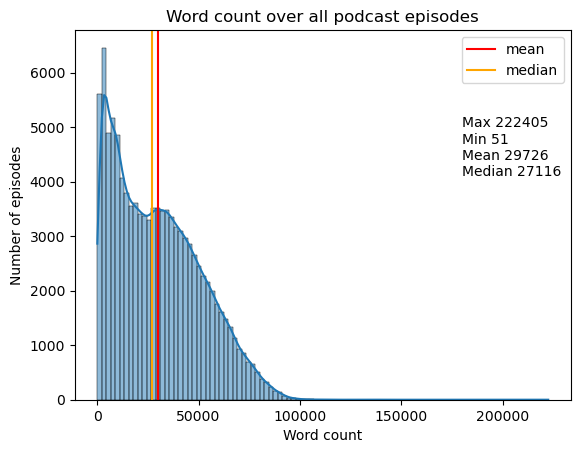

In [78]:
sns.histplot(t_data.word_count, bins = 100, kde = True)
plt.axvline(np.mean(t_data.word_count), color = "r", label = "mean")
plt.axvline(np.median(t_data.word_count), color ="orange", label = "median")
plt.text(180000, 5000, f"Max {max(t_data.word_count)}")
plt.text(180000, 4700, f"Min {min(t_data.word_count)}")
plt.text(180000, 4400, f"Mean {np.mean(t_data.word_count):.0f}")
plt.text(180000, 4100, f"Median {np.median(t_data.word_count):.0f}")
plt.title("Word count over all podcast episodes")
plt.xlabel("Word count")
plt.ylabel("Number of episodes")
plt.legend()
plt.show()

In [49]:
# Count label stats for below charts
duration_10 = t_data.groupby(t_data.duration <=10)["duration"].count().values[1]
word_count_10 = t_data.groupby(t_data.word_count <=10000)["word_count"].count().values[1]

24573

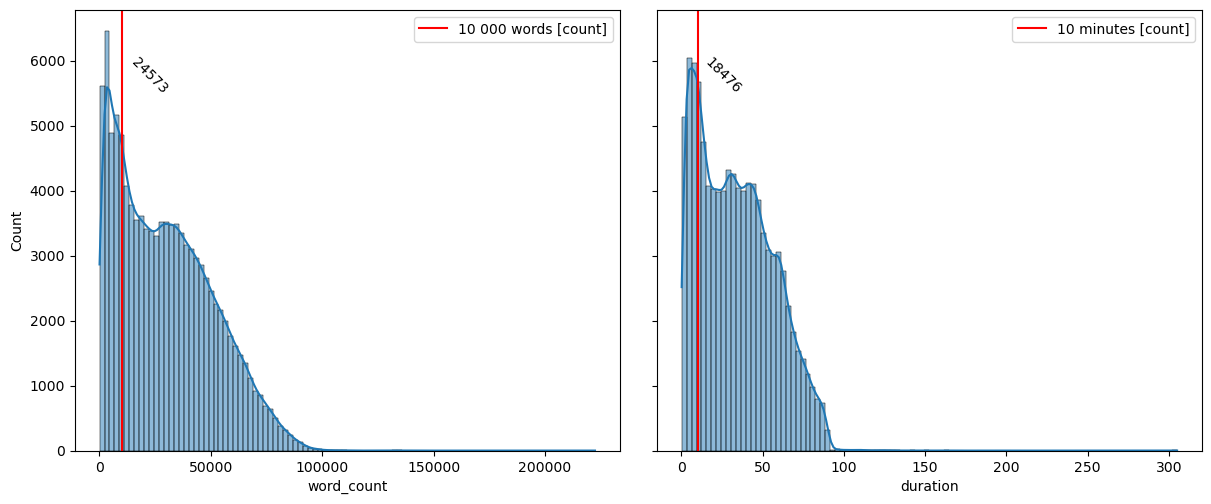

In [61]:
fig, axs = plt.subplots(1,2, figsize=(12,5), sharey=True)
fig.tight_layout()

sns.histplot(t_data.word_count, bins = 100, kde = True, ax= axs[0])
sns.histplot(t_data.duration, bins = 100, kde = True, ax= axs[1])
axs[0].axvline(10000, color= "r", label = "10 000 words [count]")
axs[0].text(13000, 5500, word_count_10, rotation=-45)
axs[1].axvline(10, color= "r", label ="10 minutes [count]")
axs[1].text(13, 5500, duration_10, rotation=-45)
axs[0].legend()
axs[1].legend()
plt.show()

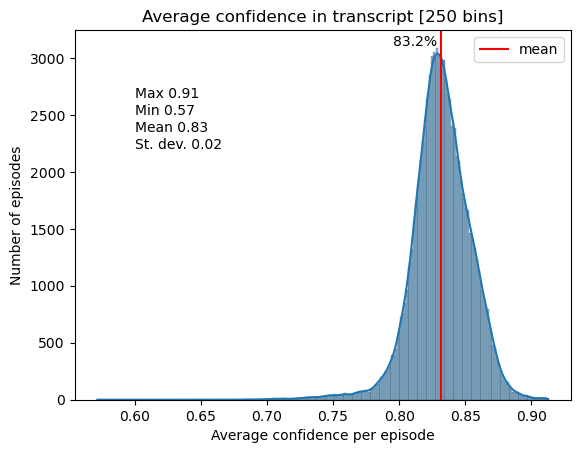

In [86]:
sns.histplot(t_data.avg_confidence, kde=True, bins = 250)
plt.axvline(np.mean(t_data.avg_confidence), color = "r", label = "mean")
plt.text(0.795, 3110, f"{np.mean(t_data.avg_confidence):.1%}")
plt.text(0.6, 2650, f"Max {max(t_data.avg_confidence):.2f}")
plt.text(0.6, 2500, f"Min {min(t_data.avg_confidence):.2f}")
plt.text(0.6, 2350, f"Mean {np.mean(t_data.avg_confidence):.2f}")
plt.text(0.6, 2200, f"St. dev. {np.std(t_data.avg_confidence):.2f}")
plt.title("Average confidence in transcript [250 bins]")
plt.xlabel("Average confidence per episode")
plt.ylabel("Number of episodes")
plt.legend()
plt.show()